<a href="https://colab.research.google.com/github/Anu-George-K/RegressionModel_Algoritms/blob/main/insurance_MLRModel3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/insurance.csv')
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [4]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [7]:
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [9]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [13]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x

,age,sex,bmi,children,smoker,region
0,19,female,27.9,0,yes,southwest
1,18,male,33.8,1,no,southeast
2,28,male,33.0,3,no,southeast
3,33,male,22.7,0,no,northwest
4,32,male,28.9,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest
1334,18,female,31.9,0,no,northeast
1335,18,female,36.9,0,no,southeast
1336,21,female,25.8,0,no,southwest


In [14]:
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

<Axes: xlabel='age', ylabel='expenses'>

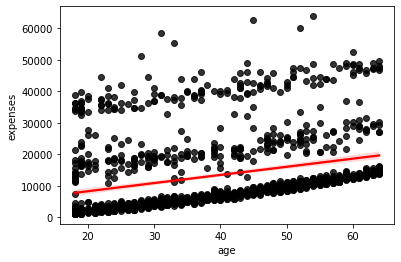

In [15]:
import seaborn as sns
sns.regplot(x=df['age'],y=y,scatter_kws={"color": "black"}, line_kws={"color": "red"})

<Axes: xlabel='bmi', ylabel='expenses'>

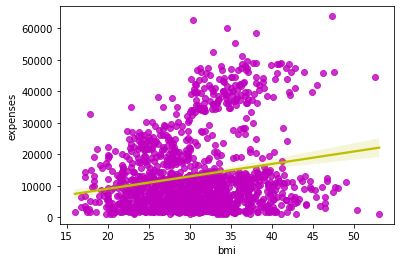

In [19]:
sns.regplot(x=df['bmi'],y=y,scatter_kws={"color": "m"}, line_kws={"color": "y"})

<Axes: xlabel='children', ylabel='expenses'>

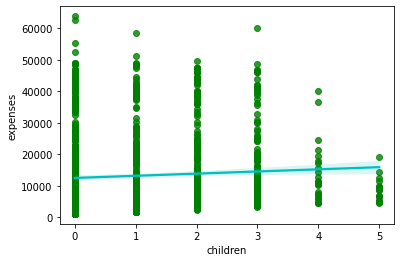

In [20]:
sns.regplot(x=df['children'],y=y,scatter_kws={"color": "g"}, line_kws={"color": "c"})

In [21]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
col_trans=make_column_transformer((OneHotEncoder(handle_unknown='ignore'),['sex','smoker','region']),remainder='passthrough')
x=col_trans.fit_transform(x)
x


array([[ 1. ,  0. ,  0. , ..., 19. , 27.9,  0. ],
       [ 0. ,  1. ,  1. , ..., 18. , 33.8,  1. ],
       [ 0. ,  1. ,  1. , ..., 28. , 33. ,  3. ],
       ...,
       [ 1. ,  0. ,  1. , ..., 18. , 36.9,  0. ],
       [ 1. ,  0. ,  1. , ..., 21. , 25.8,  0. ],
       [ 1. ,  0. ,  0. , ..., 61. , 29.1,  0. ]])

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

array([[ 1. ,  0. ,  1. , ..., 61. , 31.2,  0. ],
       [ 0. ,  1. ,  1. , ..., 46. , 27.6,  0. ],
       [ 1. ,  0. ,  1. , ..., 54. , 31.9,  3. ],
       ...,
       [ 0. ,  1. ,  1. , ..., 58. , 25.2,  0. ],
       [ 1. ,  0. ,  0. , ..., 37. , 47.6,  2. ],
       [ 0. ,  1. ,  1. , ..., 55. , 29.9,  0. ]])

In [23]:
x_test

array([[ 1. ,  0. ,  1. , ..., 45. , 25.2,  2. ],
       [ 1. ,  0. ,  1. , ..., 36. , 30. ,  0. ],
       [ 1. ,  0. ,  0. , ..., 64. , 26.9,  0. ],
       ...,
       [ 1. ,  0. ,  1. , ..., 18. , 28.2,  0. ],
       [ 0. ,  1. ,  1. , ..., 58. , 36.1,  0. ],
       [ 0. ,  1. ,  1. , ..., 20. , 22. ,  1. ]])

In [24]:
y_train

332     13429.04
355     24603.05
138     27322.73
381     42303.69
292     42112.24
          ...   
1095     4561.19
1130     8582.30
1294    11931.13
860     46113.51
1126    10214.64
Name: expenses, Length: 936, dtype: float64

In [25]:
y_test

764      9095.07
887      5272.18
890     29330.98
1293     9301.89
259     33750.29
          ...   
701      9541.70
672      4399.73
1163     2200.83
1103    11363.28
1295     1964.78
Name: expenses, Length: 402, dtype: float64

In [26]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([ 9023.69263444,  7011.89555317, 36873.90587849,  9502.39412647,
       26966.01809591, 11081.80484819,   -47.15223497, 17189.63263317,
         976.23708368, 11333.13969304, 28057.51957798,  9481.5043289 ,
        4983.59403545, 38473.87287491, 40335.14700192, 37089.36367547,
       15205.10969396, 35757.33592731,  8901.94773922, 31386.9731094 ,
        3797.55077251, 10263.40824639,  2376.08135936,  7260.27721772,
       11280.04735306, 13143.6589612 , 14623.80938162,  6073.17137991,
       10034.8100732 ,  1964.55396691,  9071.79898873, 13126.96713913,
        4318.44310318,  3227.77242086,  4489.88322475, 13374.7702596 ,
        1822.19777977,  8791.79409448, 33185.82157791, 32499.6711204 ,
        3765.00069252,  4371.8987135 , 14247.36621637, 11556.04155286,
        8721.71927142, 12239.79112416,  5197.75685359,  2983.32057022,
       35456.64287647,  9106.46587017, 15780.86105448,  2144.68843978,
       12459.64879073,  1539.3080852 , 13393.84329414, 12842.96591036,
      

In [27]:
y_test

764      9095.07
887      5272.18
890     29330.98
1293     9301.89
259     33750.29
          ...   
701      9541.70
672      4399.73
1163     2200.83
1103    11363.28
1295     1964.78
Name: expenses, Length: 402, dtype: float64

In [28]:
print("slop is",model.coef_)
print("intercept is",model.intercept_)

slop is [   -52.49762358     52.49762358 -11813.9472978   11813.9472978
    595.5377967     109.06784463   -375.08035908   -329.52528225
    261.28251281    348.96600937    424.41067944]
intercept is -1105.878112609762


In [29]:
df1=pd.DataFrame({'Actual_value':y_test,'predicted_value':y_pred,'error':y_test-y_pred})
df1

,Actual_value,predicted_value,error
764,9095.07,9023.692634,71.377366
887,5272.18,7011.895553,-1739.715553
890,29330.98,36873.905878,-7542.925878
1293,9301.89,9502.394126,-200.504126
259,33750.29,26966.018096,6784.271904
...,...,...,...
701,9541.70,16286.121022,-6744.421022
672,4399.73,6528.052794,-2128.322794
1163,2200.83,2167.141458,33.688542
1103,11363.28,14509.650536,-3146.370536


In [31]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
print("Mean Absolute Error is: ",mean_absolute_error(y_test,y_pred))
print("Mean absolute percentage error is:",mean_absolute_percentage_error(y_test,y_pred))
print("Mean Squared Error is:",mean_squared_error(y_test,y_pred))
root=mean_squared_error(y_test,y_pred)
squ=np.sqrt(root)
print("square root is:",squ)
print("r2 score is:",r2_score(y_test,y_pred))

Mean Absolute Error is:  4144.886409993458
Mean absolute percentage error is: 0.4358069585830065
Mean Squared Error is: 33777093.10084609
square root is: 5811.806354382955
r2 score is: 0.7696351080608883
